In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import rcParams

# 14,15.Importing datasheet named chipotle and assining to variable named MAC270

In [46]:
MAC270 =pd.read_table('chipotle')

# 16.Showing first five rows

In [47]:
MAC270.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# 17.Creating histogram of top 5 items

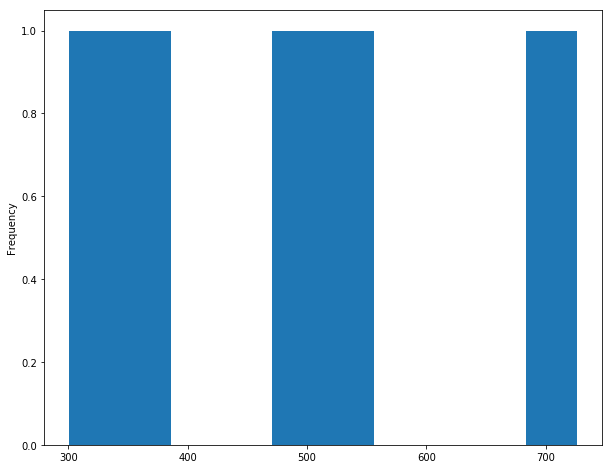

In [64]:
items = MAC270.item_name.value_counts()[:5].plot(kind='hist')

In [48]:
descriptions = MAC270.groupby(['item_name'])['order_id'].count().reset_index(name = 'order_num')

In [49]:
Num_sold = descriptions.sort_values( 'order_num', ascending = False)

In [50]:
Num_sold.head()

,item_name,order_num
17,Chicken Bowl,726
18,Chicken Burrito,553
25,Chips and Guacamole,479
39,Steak Burrito,368
10,Canned Soft Drink,301


In [51]:
y = Num_sold['order_num'][:5]
x = Num_sold['item_name'][:5]
color = ['red', 'yellow', 'indigo', 'blue', 'green']

Text(0.5, 1.0, 'Top 5 items sold')

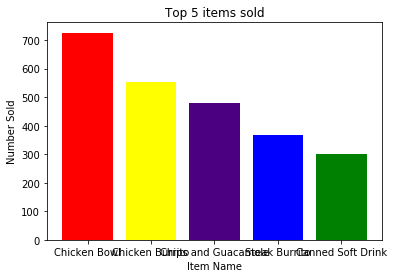

In [52]:
plt.bar(x, y, color = color)
plt.xlabel('Item Name')
plt.ylabel('Number Sold')
plt.title('Top 5 items sold')

# 18. Creating scatterplot with the number of items ordered per order price

In [53]:
MAC270.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [54]:
MAC270.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [55]:
# Replacing '$'with nothing from item_price
MAC270['item_price'] = MAC270['item_price'].str.replace('$', "")

In [56]:
MAC270['item_price'] = MAC270['item_price'].astype(float)

In [57]:
MAC270['item_price'][:5]

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [58]:
# grouping the number of items sold by item price
# counting the total number of items sold
groupDesc = MAC270.groupby(['item_price'])['item_price'].count().reset_index(name ="Num_sold")

In [59]:
groupDesc.head()

,item_price,Num_sold
0,1.09,106
1,1.25,264
2,1.50,117
3,1.69,99
4,1.99,1


In [62]:
rcParams['figure.figsize'] = 10, 8

Text(0.5, 1.0, 'Number of Items Ordered per Order Price')

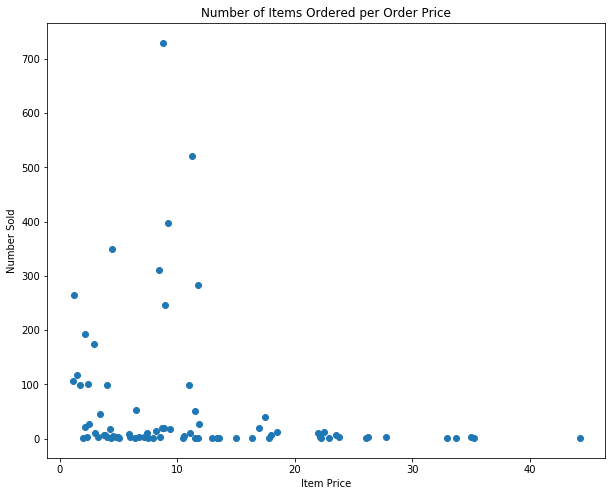

In [63]:
plt.scatter(groupDesc['item_price'], groupDesc['Num_sold'])
plt.xlabel('Item Price')
plt.ylabel('Number Sold')
plt.title('Number of Items Ordered per Order Price')

# Draw a graph of top 15 items 

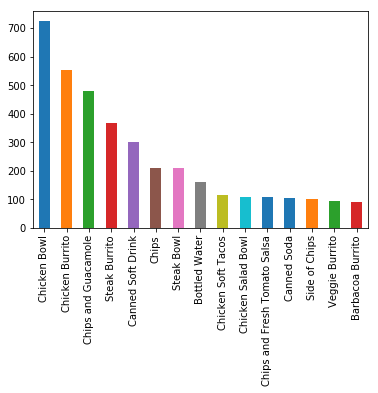

In [61]:
items = MAC270.item_name.value_counts()[:15].plot(kind='bar')